In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


The breakdown of problem #1:
1. Compute CHUR evolution from 4.5 Ga to present using initial 176Hf/177Hf = 0.280017 and 176Lu/177Hf = 0.0332.
2. Compute CHUR value at 3.0 Ga evolving with 176Lu/177Hf = 0.0414
3. Compute CHUR of partial melting for each of the specified 176Lu/177Hf.
4. Calculate present day Epsilon-Hf for each of the 4 reservoirs.

In [4]:
# Constants
lam_lu = 1.867e-11           # decay constant for 176Lu (yr^-1)
t_total = 4.5e9              # total time span (years)
t_split = 3.0e9              # time of crust/mantle separation (years)
hf_init_4p5 = 0.280017       # initial 176Hf/177Hf at 4.5 Ga
lu_hf_chur = 0.0332          # CHUR 176Lu/177Hf ratio

# Lu/Hf for reservoirs formed at 3.0 Ga
lu_hf_b = 0.0414   # depleted mantle residue
lu_hf_c = 0.0219   # basaltic crust
lu_hf_d = 0.0005   # zircon

In [5]:

# Radiogenic growth function
def hf_ratio(initial_hf, lu_hf, delta_t):
    """Return evolved 176Hf/177Hf after delta_t years."""
    return initial_hf + lu_hf * (np.exp(lam_lu * delta_t) - 1)

# Time arrays
t1 = np.linspace(0, t_total, 500)        # CHUR: 4.5 Ga → 0
t2 = np.linspace(0, t_split, 300)        # For plotting from 3.0 Ga → 0

# CHUR evolution
hf_chur = hf_ratio(hf_init_4p5, lu_hf_chur, t1)

# CHUR composition at 3.0 Ga
hf_chur_3ga = hf_ratio(hf_init_4p5, lu_hf_chur, t_total - t_split)

# Reservoir evolutions (3.0 Ga → 0)
hf_b = hf_ratio(hf_chur_3ga, lu_hf_b, t2)
hf_c = hf_ratio(hf_chur_3ga, lu_hf_c, t2)
hf_d = hf_ratio(hf_chur_3ga, lu_hf_d, t2)

# CHUR at present
hf_chur_present = hf_ratio(hf_init_4p5, lu_hf_chur, t_total)

# εHf calculation (at present)
def eps_hf(sample, chur_present):
    return (sample / chur_present - 1) * 1e4

eps_b = eps_hf(hf_b[-1], hf_chur_present)
eps_c = eps_hf(hf_c[-1], hf_chur_present)
eps_d = eps_hf(hf_d[-1], hf_chur_present)



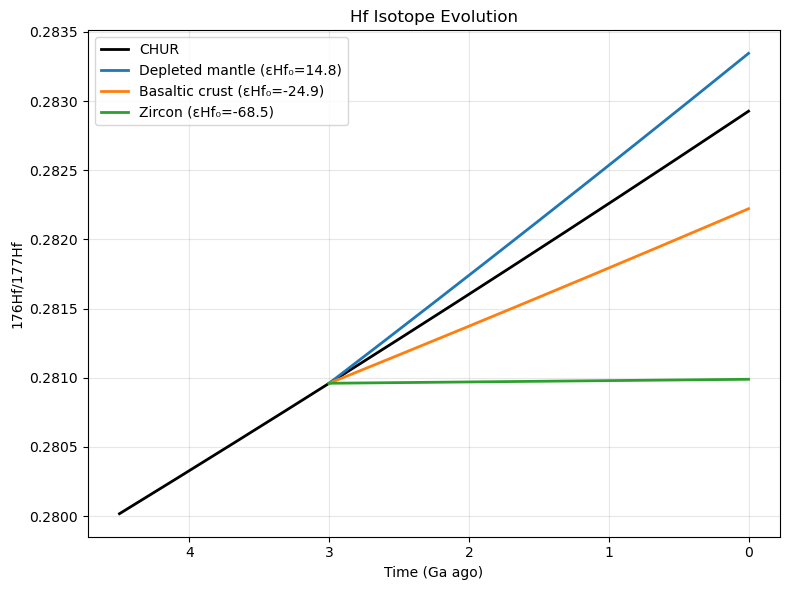

Present-day Hf ratios and εHf values:
  CHUR present: 0.282926821
  Depleted mantle: 0.283344889, εHf = 14.78
  Basaltic crust: 0.282221528, εHf = -24.93
  Zircon: 0.280988712, εHf = -68.50


In [6]:
# Plot 
plt.figure(figsize=(8,6))
plt.plot((t_total - t1)/1e9, hf_chur, label="CHUR", color='k', lw=2)
plt.plot((t_split - t2)/1e9, hf_b, label=f"Depleted mantle (εHf₀={eps_b:.1f})", lw=2)
plt.plot((t_split - t2)/1e9, hf_c, label=f"Basaltic crust (εHf₀={eps_c:.1f})", lw=2)
plt.plot((t_split - t2)/1e9, hf_d, label=f"Zircon (εHf₀={eps_d:.1f})", lw=2)

plt.xlabel("Time (Ga ago)")
plt.ylabel("176Hf/177Hf")
plt.title("Hf Isotope Evolution")
plt.gca().invert_xaxis()  # makes time run from 4.5 → 0 Ga
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print
print("Present-day Hf ratios and εHf values:")
print(f"  CHUR present: {hf_chur_present:.9f}")
print(f"  Depleted mantle: {hf_b[-1]:.9f}, εHf = {eps_b:.2f}")
print(f"  Basaltic crust: {hf_c[-1]:.9f}, εHf = {eps_c:.2f}")
print(f"  Zircon: {hf_d[-1]:.9f}, εHf = {eps_d:.2f}")



Problem # 2:
Construct a U-Pb diagram for 0-3500 Ma

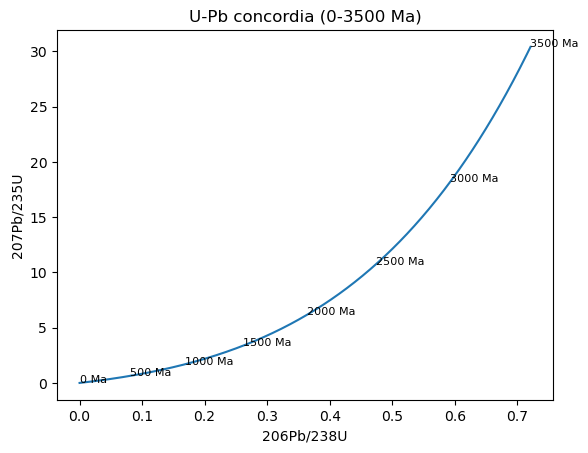

In [7]:

lam238 = 1.55125e-10
lam235 = 9.8485e-10
t_yr = np.linspace(0, 3.5e9, 500)
x = np.exp(lam238*t_yr) - 1.0  # 206Pb/238U
y = np.exp(lam235*t_yr) - 1.0  # 207Pb/235U

plt.plot(x, y)
plt.xlabel('206Pb/238U')
plt.ylabel('207Pb/235U')
# annotate a few ages:
for age_Ga in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]:
    age = age_Ga * 1e9
    xi = np.exp(lam238*age) - 1
    yi = np.exp(lam235*age) - 1
    plt.text(xi, yi, f'{int(age_Ga*1000)} Ma', fontsize=8)
plt.title('U-Pb concordia (0-3500 Ma)')
plt.show()


Problem #3:

Use linear regression to calculate slope and intercept for the best-fit line to the data on the isochron diagram. 

In [15]:
x = np.array([87.71,209.2,27.8,141.7,73.08,257.7,263.5,281.1])
y = np.array([0.77999,0.88424,0.72951,0.82569,0.76731,0.92449,0.92847,0.94542])
sy = np.array([4e-5,2e-5,3e-5,4e-5,2e-5,2e-5,4e-5,5e-5])
w = 1.0/(sy**2)

xbar = np.sum(w*x)/np.sum(w)
ybar = np.sum(w*y)/np.sum(w)
slope = np.sum(w*(x-xbar)*(y-ybar)) / np.sum(w*(x-xbar)**2)
intercept = ybar - slope*xbar
var_slope = 1.0/np.sum(w*(x-xbar)**2)
var_intercept = np.sum(w*x**2)/(np.sum(w)*np.sum(w*(x-xbar)**2))
slope_err = np.sqrt(var_slope)
intercept_err = np.sqrt(var_intercept)

# convert slope to age:
lam_rb = 1.397e-11
age_yr = np.log(1.0 + slope)/lam_rb
age_Ma = age_yr/1e6
age_err_Ma = (slope_err/((1+slope)*lam_rb)) / 1e6

Slope (m) = 0.000851
Intercept (b) = 0.705446


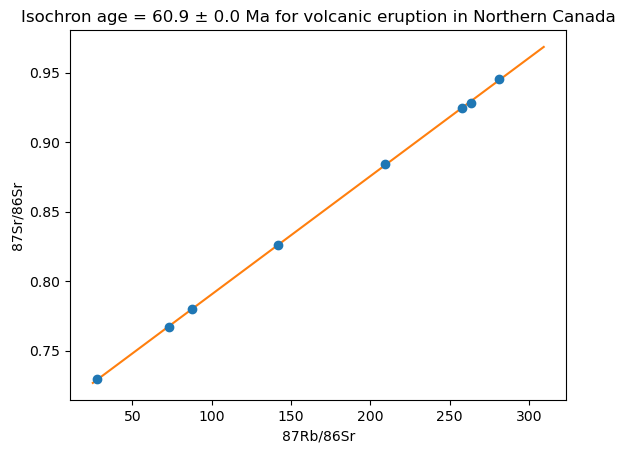

In [16]:
print("Slope (m) =", round(slope, 6))
print("Intercept (b) =", round(intercept, 6))

# plotting
plt.errorbar(x, y, yerr=sy, fmt='o')
xs = np.linspace(min(x)*0.9, max(x)*1.1, 200)
plt.plot(xs, intercept + slope*xs, '-')
plt.title(f'Isochron age = {age_Ma:.1f} ± {age_err_Ma:.1f} Ma for volcanic eruption in Northern Canada')
plt.xlabel('87Rb/86Sr')
plt.ylabel('87Sr/86Sr')
plt.show()

Problem #4:

Use Linear regression to fit a mixing line to 87Sr/86Sr vs 1/Sr.
Calculate the concentration of Sr in the end members, then compute the proportions of these end members in all 5 samples using the Sr concentrations.

In [17]:
Sr = np.array([221,298,476,900,1551], dtype=float)
R = np.array([0.7124,0.7097,0.7067,0.7043,0.7032])
x = 1.0/Sr
y = R
A = np.vstack([x, np.ones_like(x)]).T
m, b = np.linalg.lstsq(A, R, rcond=None)[0]
RA = 0.7180
RB = 0.7025
CA = m/(RA - b)
CB = m/(RB - b)
pA = (Sr - CB)/(CA - CB)

frac_A = (Sr - CB) / (CA - CB)
frac_B = 1 - frac_A

Slope (m) = 2.377704
Intercept (b) = 0.701678
End member Sr concentrations:
  CA (R=0.718) = 145.68 ppm
  CB (R=0.7025) = 2894.14 ppm

Fraction of A (cold seep) in each sample:
  Sample 1: Sr=221.0 ppm → fA = 97.3%
  Sample 2: Sr=298.0 ppm → fA = 94.5%
  Sample 3: Sr=476.0 ppm → fA = 88.0%
  Sample 4: Sr=900.0 ppm → fA = 72.6%
  Sample 5: Sr=1551.0 ppm → fA = 48.9%


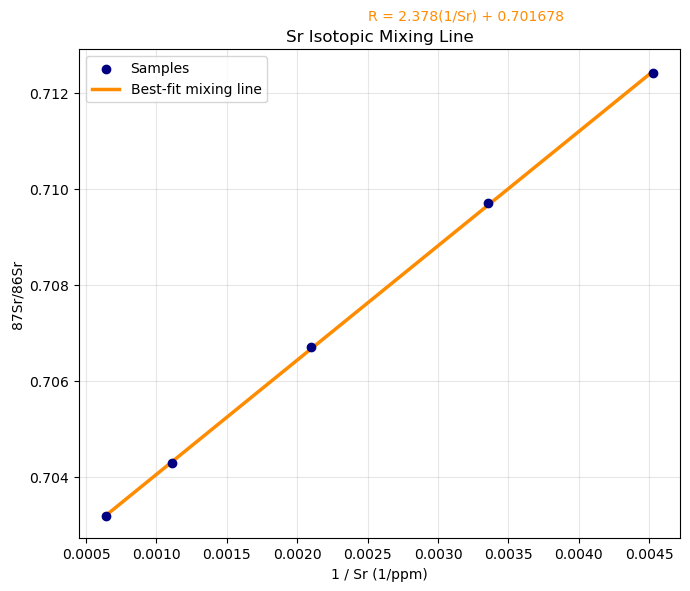

In [18]:
print("Slope (m) =", round(m, 6))
print("Intercept (b) =", round(b, 6))
print(f"End member Sr concentrations:")
print(f"  CA (R={RA}) = {CA:.2f} ppm")
print(f"  CB (R={RB}) = {CB:.2f} ppm\n")

print("Fraction of A (cold seep) in each sample:")
for i in range(len(Sr)):
    print(f"  Sample {i+1}: Sr={Sr[i]} ppm → fA = {frac_A[i]*100:.1f}%")

# Plotting
plt.figure(figsize=(7,6))
plt.scatter(x, y, color='navy', label="Samples", zorder=3)
plt.plot(x, m*x + b, color='darkorange', lw=2.5, label="Best-fit mixing line")

# Annotate fit equation
eq_label = f"R = {m:.3f}(1/Sr) + {b:.6f}"
plt.text(0.0025, 0.7135, eq_label, fontsize=10, color='darkorange')

# Plot formatting
plt.xlabel("1 / Sr (1/ppm)")
plt.ylabel("87Sr/86Sr")
plt.title("Sr Isotopic Mixing Line")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()